# High Dynamic Range (HDR) Using OpenCV

Learning resources:
1. https://en.m.wikipedia.org/wiki/Multi-exposure_HDR_capture
2. https://docs.opencv.org/3.4/d2/df0/tutorial_py_hdr.html
3. https://youtu.be/At8OwPNgzTY
4. https://youtu.be/fvqAmmSN-Bw

In [ ]:
!pip uninstall pillow
!pip install -Iv pillow==7.1.2

In [15]:
# This images taken from Wikipedia

# example image 1
!wget https://upload.wikimedia.org/wikipedia/commons/0/09/StLouisArchMultExpEV-4.72.JPG -P /content/example-images/images-1
!wget https://upload.wikimedia.org/wikipedia/commons/c/c3/StLouisArchMultExpEV-1.82.JPG -P /content/example-images/images-1
!wget https://upload.wikimedia.org/wikipedia/commons/8/89/StLouisArchMultExpEV%2B1.51.JPG -P /content/example-images/images-1
!wget https://upload.wikimedia.org/wikipedia/commons/8/8f/StLouisArchMultExpEV%2B4.09.JPG -P /content/example-images/images-1

# example image 2
!wget https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_01.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/c/c1/HDRI_Sample_Scene_Window_-_02.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/5/5b/HDRI_Sample_Scene_Window_-_03.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_04.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/d/d1/HDRI_Sample_Scene_Window_-_05.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_06.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/b/b6/HDRI_Sample_Scene_Window_-_07.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/f/f8/HDRI_Sample_Scene_Window_-_08.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/8/83/HDRI_Sample_Scene_Window_-_09.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/c/c0/hdri_sample_scene_window_-_10.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_11.jpg -P /content/example-images/images-2
!wget https://upload.wikimedia.org/wikipedia/commons/8/8b/HDRI_Sample_Scene_Window_-_12.jpg -P /content/example-images/images-2

--2022-08-14 07:21:22--  https://upload.wikimedia.org/wikipedia/commons/0/09/StLouisArchMultExpEV-4.72.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 902169 (881K) [image/jpeg]
Saving to: ‘/content/example-images/images-1/StLouisArchMultExpEV-4.72.JPG’

StLouisArchMultExpE 100%[===================>] 881.02K  --.-KB/s    in 0.1s    

2022-08-14 07:21:22 (8.73 MB/s) - ‘/content/example-images/images-1/StLouisArchMultExpEV-4.72.JPG’ saved [902169/902169]

--2022-08-14 07:21:22--  https://upload.wikimedia.org/wikipedia/commons/c/c3/StLouisArchMultExpEV-1.82.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as pydis
from os import walk
from PIL import Image, ExifTags

In [17]:


# Load images and exposure time function 
def loadImagesAndTimes(dir, filenames, extime = []):
  
  is_given = len(extime) == 0
  
  images = []

  for filename in filenames:
    im = cv2.imread(dir+filename)
    images.append(im)
    
    if is_given:
      img = Image.open(dir+filename)
      exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
      extime.append(exif["ExposureTime"][0] / exif["ExposureTime"][1])

  times = np.array(extime, dtype=np.float32)
  
  return images, times

In [18]:

# image resize function 
def resize(img_src, basewidth, new_name):
  img = Image.open(img_src)
  wpercent = (basewidth/float(img.size[0]))
  hsize = int((float(img.size[1])*float(wpercent)))
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)
  img.save(new_name)
  return img.size

In [20]:

# Calculat Exposure Time function
def CalculatExposureTime(str):
  isDivisibal = str.find("/")
  if isDivisibal == -1:
    return float(str)
  else:
    a = str[:isDivisibal]
    b = str[isDivisibal+1:]
  return float(a)/float(b)

In [24]:
dir_in = "/content/example-images/images-2/"  #@param {type:"string"}
dir_in = dir_in + "/"


image_files = []
expose_times = []

file_list = next(walk(dir_in), (None, None, []))[2]  # [] if no file

for filename in file_list:
  if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
    image_files.append(filename)


if len(image_files) == 0:
   print("Images file can't found in this input directory.")
else:
  list_counter = 1
  for filename in image_files:
    print("Image " + str(list_counter) + ": " + filename)
    # display(Image(dir_path + filename))
    list_counter += 1

Image 1: HDRI_Sample_Scene_Window_-_12.jpg
Image 2: HDRI_Sample_Scene_Window_-_07.jpg
Image 3: HDRI_Sample_Scene_Window_-_05.jpg
Image 4: HDRI_Sample_Scene_Window_-_06.jpg
Image 5: HDRI_Sample_Scene_Window_-_02.jpg
Image 6: HDRI_Sample_Scene_Window_-_01.jpg
Image 7: HDRI_Sample_Scene_Window_-_03.jpg
Image 8: HDRI_Sample_Scene_Window_-_04.jpg
Image 9: HDRI_Sample_Scene_Window_-_09.jpg
Image 10: HDRI_Sample_Scene_Window_-_08.jpg
Image 11: HDRI_Sample_Scene_Window_-_11.jpg


In [ ]:
# input image exposure time but it is optional because image exposure time automatic gat from image meta data

list_counter = 1

for image in image_files:
  print("Image " + str(list_counter) + ": " + image)
  input_val = input("Exposure Time: ")
  expose_times.append(CalculatExposureTime(input_val))  
  list_counter += 1
print(expose_times)

In [27]:
if __name__ == '__main__':
  
  # Read images and exposure times
  print("Reading images ... ")

  expose_images, expose_images_times = loadImagesAndTimes(dir_in, image_files, expose_times)

Reading images ... 


In [28]:
  # Align input images
  print("Aligning images ... ")
  alignMTB = cv2.createAlignMTB()
  alignMTB.process(expose_images, expose_images)

Aligning images ... 


## Debevec algorithms

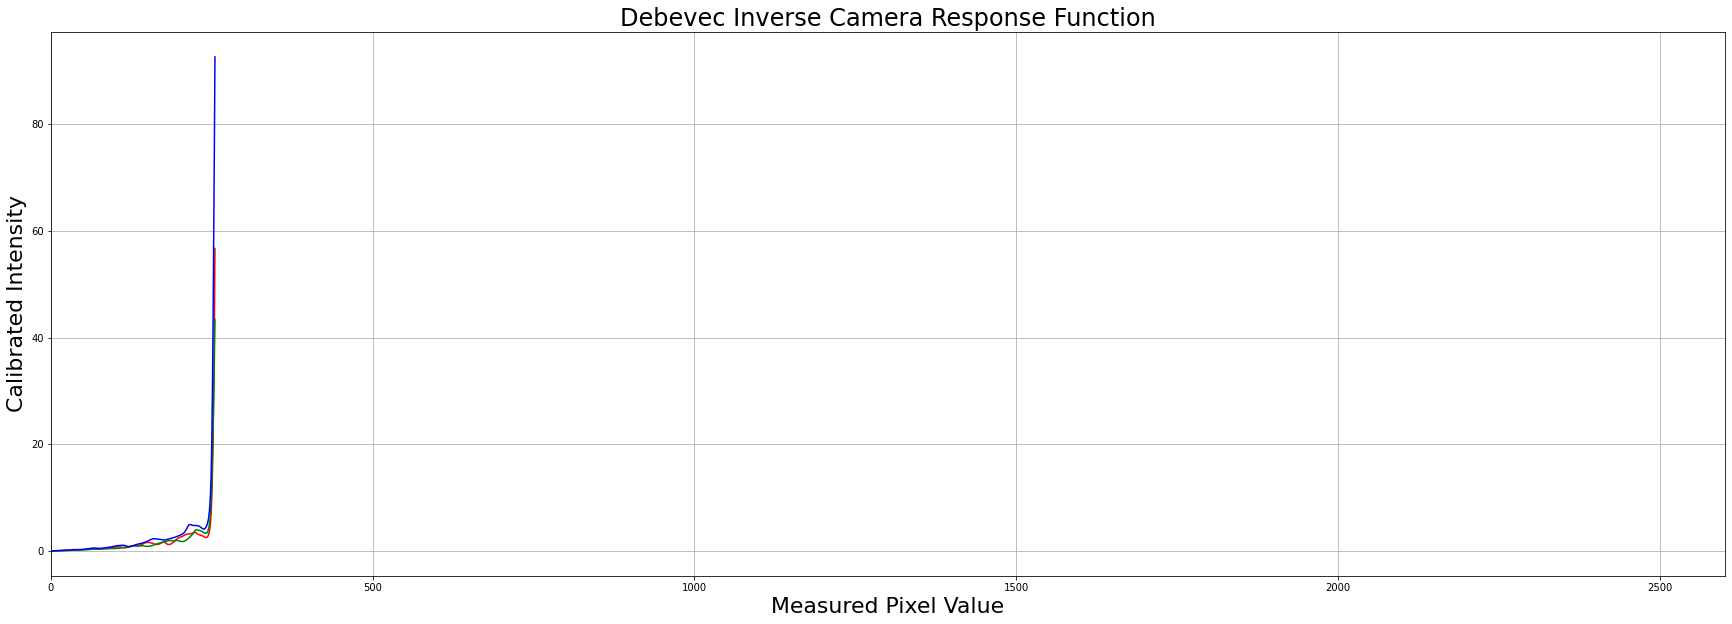

In [29]:
#Find Camera Response Function (CRF)

calibrate_debevec = cv2.createCalibrateDebevec()
response_debevec = calibrate_debevec.process(expose_images, expose_images_times)


#Plot CRP

x= np.arange(256, dtype=np. uint8)

y = np.squeeze (response_debevec)

ax = plt.figure(figsize=(30,10))

plt.title("Debevec Inverse Camera Response Function", fontsize=24)

plt.xlabel("Measured Pixel Value", fontsize=22)

plt.ylabel("Calibrated Intensity", fontsize=22)

plt.xlim([0,2601])

plt.grid()
plt.plot(x, y[:,0], 'r' , x, y[:,1],'g', x, y[:,2], 'b');

In [30]:
# Merge images into an HDR linear image
print("Merging images into one HDR image using Debevec Algorithm...")

merge_debevec = cv2.createMergeDebevec()
# hdr_debevec = merge_debevec.process(expose_images, times = expose_images_times.copy())
hdr_debevec = merge_debevec.process(expose_images, expose_images_times.copy(), response_debevec)

# Save HDR image.
cv2.imwrite("hdrDebevec.hdr", hdr_debevec)
print("Saved: " + "hdrDebevec.hdr ")

Merging images into one HDR image using Debevec Algorithm...
Saved: hdrDebevec.hdr 


Tonemaping using Drago's method ... 
Saved: ldr_drago.jpg


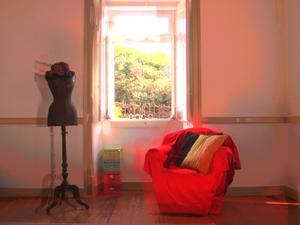

In [34]:
#@title Tonemap using Drago's method to obtain 24-bit color image


gamma =   1.0#@param {type:"number"}
saturation =   0.7#@param {type:"number"}
bias =   0.8 #@param {type:"number"}


print("Tonemaping using Drago's method ... ")
tonemap_drago = cv2.createTonemapDrago(gamma, saturation, bias)
ldr_drago = tonemap_drago.process(hdr_debevec.copy())

ldr_drago = 3 * ldr_drago
cv2.imwrite("ldr_drago.jpg", ldr_drago * 255)

print("Saved: ldr_drago.jpg")


# resize and display
resize("ldr_drago.jpg", 300, "ldr_drago_preview.jpg")
pydis.display(pydis.Image('ldr_drago_preview.jpg'))

Tonemaping using Reinhard's method ... 
Saved: ldr_reinhard.jpg


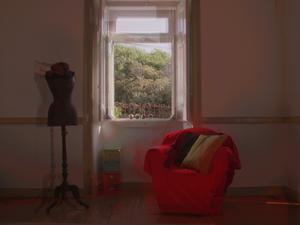

In [35]:
#@title Tonemap using Reinhard's method to obtain 24-bit color image

gamma =  1.5 #@param {type:"number"}
intensity =  0 #@param {type:"number"}
light_adapt =  0#@param {type:"number"}
color_adapt =  0#@param {type:"number"}

print("Tonemaping using Reinhard's method ... ")

tonemap_reinhard = cv2.createTonemapReinhard(gamma, intensity, light_adapt, color_adapt)
ldr_reinhard = tonemap_reinhard.process(hdr_debevec)

cv2.imwrite("ldr_reinhard.jpg", ldr_reinhard * 225)

print("Saved: ldr_reinhard.jpg")


# resize and display
resize("ldr_reinhard.jpg", 300, "ldr_reinhard_preview.jpg")
pydis.display(pydis.Image('ldr_reinhard_preview.jpg'))

Tonemaping using Mantiuk's method ... 
Saved: ldr_mantiuk.jpg


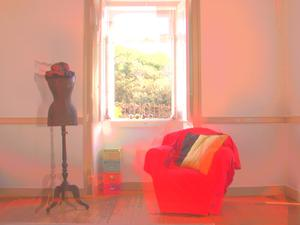

In [36]:
#@title Tonemap using Mantiuk's method to obtain 24-bit color image

gamma =  2.2#@param {type:"number"}
scale =  0.85#@param {type:"number"}
saturation =  1.2#@param {type:"number"}

print("Tonemaping using Mantiuk's method ... ")

tonemap_mantiuk = cv2.createTonemapMantiuk(gamma, scale, saturation)
ldr_mantiuk = tonemap_mantiuk.process(hdr_debevec)


ldr_mantiuk = 3 * ldr_mantiuk
cv2.imwrite("ldr_mantiuk.jpg", ldr_mantiuk * 255)

print("Saved: ldr_mantiuk.jpg")


# resize and display
resize("ldr_mantiuk.jpg", 300, "ldr_mantiuk_preview.jpg")
pydis.display(pydis.Image('ldr_mantiuk_preview.jpg'))

## Robertson algorithms

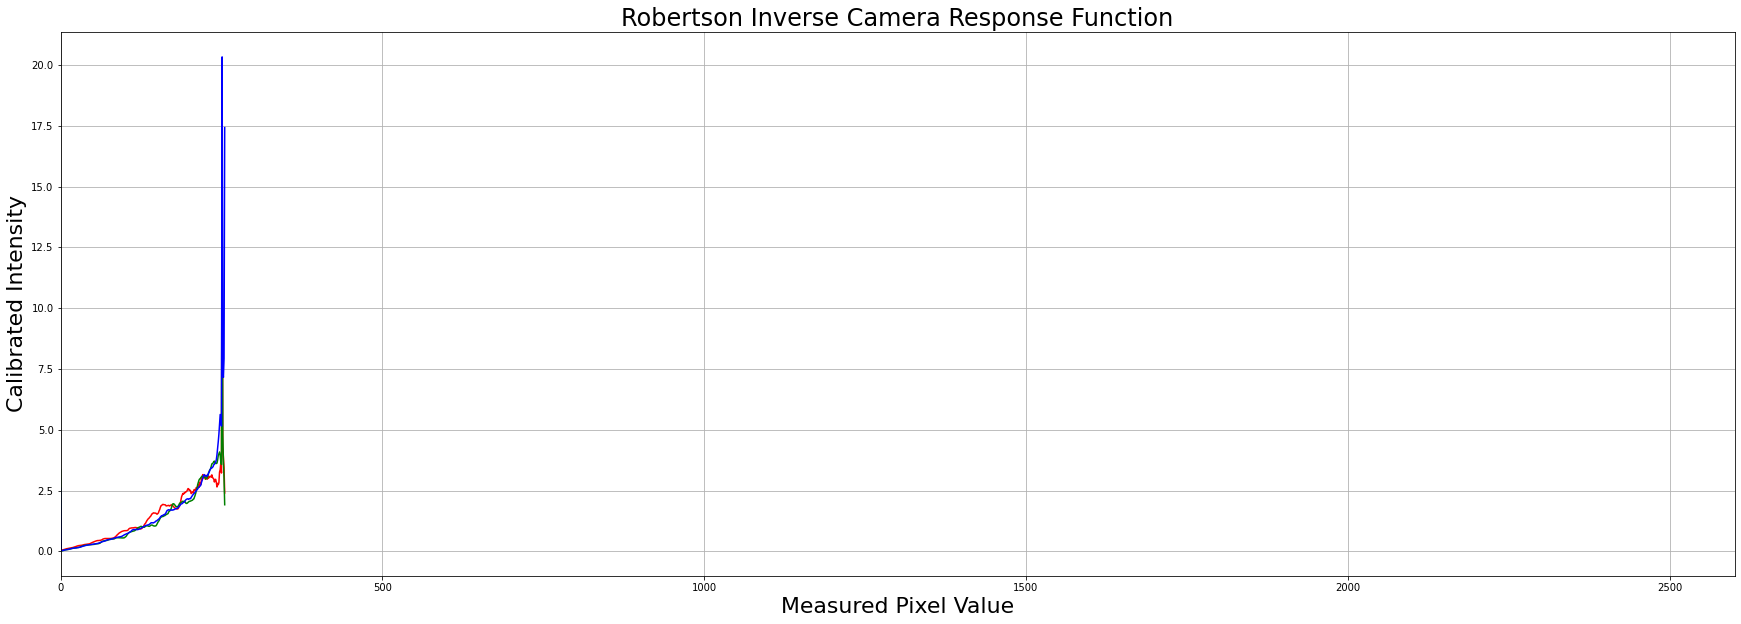

In [38]:

#Find Camera Response Function (CRF)

cal_robertson = cv2.createCalibrateRobertson()
crf_robertson = cal_robertson.process(expose_images, expose_images_times)

#Plot CRP
x= np.arange(256, dtype=np. uint8)
y = np.squeeze (crf_robertson)
ax = plt.figure(figsize=(30,10))
plt.title("Robertson Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0,2601])
plt.grid()
plt.plot(x, y[:,0], 'r' , x, y[:,1],'g', x, y[:,2], 'b');

In [39]:
# Merge images into an HDR linear image
print("Merging images into one HDR image using Debevec Algorithm...")

merge_robertson = cv2.createMergeRobertson()
# merge_robertson = merge_robertson.process(expose_images, times = expose_images_times.copy())
hdr_robertson = merge_robertson.process(expose_images, expose_images_times.copy(), crf_robertson)

# Save HDR image.
cv2.imwrite("hdr_robertson.hdr", hdr_robertson)
print("Saved: " + "hdr_robertson.hdr ")

Merging images into one HDR image using Debevec Algorithm...
Saved: hdr_robertson.hdr 


Tonemaping using Drago's method ... 
Saved: ldr_drago_2.jpg


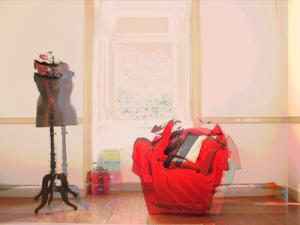

In [40]:
#@title Tonemap using Drago's method to obtain 24-bit color image


gamma =   1.0#@param {type:"number"}
saturation =   0.7#@param {type:"number"}
bias =   0.8 #@param {type:"number"}


print("Tonemaping using Drago's method ... ")
tonemap_drago = cv2.createTonemapDrago(gamma, saturation, bias)
ldr_drago_2 = tonemap_drago.process(hdr_robertson.copy())

ldr_drago_2 = 3 * ldr_drago_2
cv2.imwrite("ldr_drago_2.jpg", ldr_drago_2 * 255)

print("Saved: ldr_drago_2.jpg")


# resize and display
resize("ldr_drago_2.jpg", 300, "ldr_drago_2_preview.jpg")
pydis.display(pydis.Image('ldr_drago_2_preview.jpg'))

Tonemaping using Reinhard's method ... 
Saved: ldr_reinhard_2.jpg


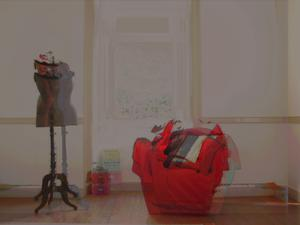

In [41]:
# Tonemap using Reinhard's method to obtain 24-bit color image

gamma =   1.5#@param {type:"number"}
intensity =   0#@param {type:"number"}
light_adapt =   0#@param {type:"number"}
color_adapt =  0 #@param {type:"number"}

print("Tonemaping using Reinhard's method ... ")

tonemap_reinhard = cv2.createTonemapReinhard(gamma, intensity, light_adapt, color_adapt)
ldr_reinhard_2 = tonemap_reinhard.process(hdr_robertson.copy())

cv2.imwrite("ldr_reinhard_2.jpg", ldr_reinhard_2 * 225)

print("Saved: ldr_reinhard_2.jpg")


# resize and display
resize("ldr_reinhard_2.jpg", 300, "ldr_reinhard_2_preview.jpg")
pydis.display(pydis.Image('ldr_reinhard_2_preview.jpg'))

Tonemaping using Mantiuk's method ... 
Saved: ldr_mantiuk_2.jpg


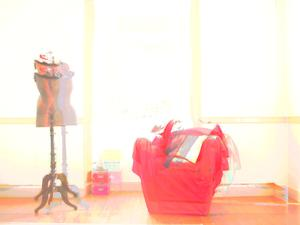

In [42]:
# Tonemap using Mantiuk's method to obtain 24-bit color image

gamma =  2.2#@param {type:"number"}
scale =  0.85#@param {type:"number"}
saturation =  1.2#@param {type:"number"}

print("Tonemaping using Mantiuk's method ... ")

tonemap_mantiuk = cv2.createTonemapMantiuk(gamma, scale, saturation)
ldr_mantiuk_2 = tonemap_mantiuk.process(hdr_robertson.copy())


ldr_mantiuk_2 = 3 * ldr_mantiuk_2
cv2.imwrite("ldr_mantiuk_2.jpg", ldr_mantiuk_2 * 255)

print("Saved: ldr_mantiuk_2.jpg")


# resize and display
resize("ldr_mantiuk_2.jpg", 300, "ldr_mantiuk_2_preview.jpg")
pydis.display(pydis.Image('ldr_mantiuk_2_preview.jpg'))

## Mertens fusion algorithms

In [43]:
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(expose_images)

# Save HDR image.
cv2.imwrite("hdr_mertens.hdr", res_mertens)
print("saved hdr_mertens.hdr")

saved hdr_mertens.hdr


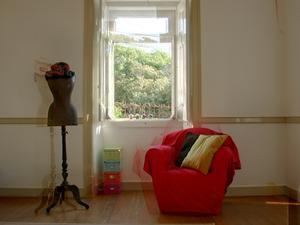

In [44]:
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
cv2.imwrite("fusion_mertens.jpg", res_mertens_8bit)

#cv2.imwrite("fusion_mertens.jpg", res_mertens * 255)

# resize and display
resize("fusion_mertens.jpg", 300, "fusion_mertens_preview.jpg")
pydis.display(pydis.Image('fusion_mertens_preview.jpg'))